## Q3) Outlier Detection
Outlier detection (also known as '*anomaly detection*') is the process of finding observation points that are very distant from other observations. Such observation points are called outliers or anomalies. In this question,  you will employ simple visualization and statistical techniques to find the outliers and then, you will apply  outlier detection algorithms. 

You will be using the same **"customer_segemntation"** dataset that was used in the Q1. 


In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from matplotlib import cm

In [11]:
#loading the dataset
cust_df = pd.read_csv("customer_segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [12]:
cust = cust_df.copy()
cust = cust.dropna()
cust.drop(columns=['Address', 'Customer Id'], inplace=True)
# print(cust.columns)
cust

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

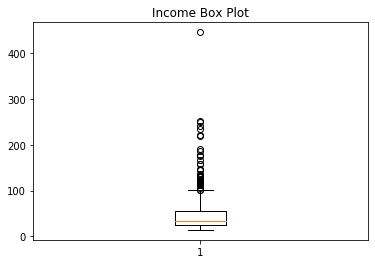

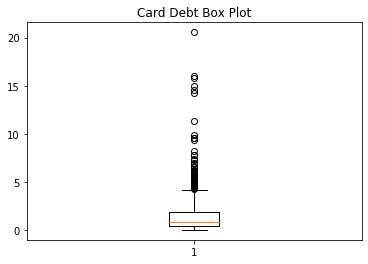

In [13]:
#Write code here
plt.boxplot(cust['Income'])
plt.title('Income Box Plot')
plt.show()
plt.boxplot(cust['Card Debt'])
plt.title('Card Debt Box Plot')
plt.show()

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

Text(0.5, 1.0, 'Scatter of Income vs DebtIncomeOutliers')

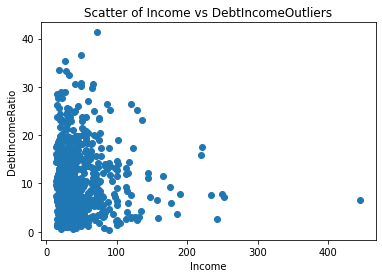

In [14]:
#Write code here
plt.scatter(cust['Income'], cust['DebtIncomeRatio'])
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Scatter of Income vs DebtIncomeOutliers')

It shows some outliers. It shows one or two observations with unusally high income and another with unusually high debt to income ratio

### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [15]:
from scipy.stats import zscore
#Write code here
threshold = 3
print('Age:', cust['Age'][abs(zscore(cust['Age'])) > threshold].values)
print('Other Debt:', cust['Other Debt'][abs(zscore(cust['Other Debt'])) > threshold].values)
print('Debt Income Ration:', cust['DebtIncomeRatio'][abs(zscore(cust['DebtIncomeRatio'])) > threshold].values)

Age: []
Other Debt: [18.257 14.453 15.405 23.104 20.616 17.185 13.051 15.149 17.799 18.269
 14.719 17.204 12.959 16.668 27.034]
Debt Income Ration: [32.5 41.3 35.3 33.3 36.6 30.8 33.4]


* **What z-score threshold did you use to detect the outliers and why?**
I used 3 because 2 and 2.5 that were suggested values were showing values that according to my domain knowledge didn't seem as outlier. For Example Age 53-56 isn't an outlier

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [16]:
#Write code here
k = 1.5
q1 = 25
q3 = 75
for var in ['Age', 'Other Debt', 'DebtIncomeRatio']:
    q1_age = np.percentile(cust[var], q1)
    q3_age = np.percentile(cust[var], q3)
    iqr = stats.iqr(cust[var])
    lower_outlier = list(cust.loc[cust[var] < (q1_age - (k * iqr)), var].values)
    higher_outlier = list(cust.loc[cust[var] > (q3_age + (k * iqr)), var].values)
    print(var, lower_outlier + higher_outlier)

Age []
Other Debt [8.908, 18.257, 10.184, 9.555, 9.459, 10.754000000000001, 14.453, 15.405, 11.874, 9.251, 12.075999999999999, 23.104, 8.6, 9.044, 9.737, 11.894, 20.616, 11.724, 11.042, 17.185, 13.050999999999998, 12.659, 9.591000000000001, 8.502, 15.149000000000001, 17.799, 18.269000000000002, 9.391, 12.714, 14.719000000000001, 17.204, 12.959000000000001, 8.399, 16.668, 27.034000000000002, 9.704, 9.716000000000001, 9.499, 11.663, 12.422, 10.98, 10.630999999999998, 9.975, 10.811, 9.198, 8.631, 9.286, 8.362]
DebtIncomeRatio [32.5, 29.7, 30.1, 28.9, 28.5, 30.7, 28.9, 41.3, 30.6, 35.3, 33.3, 36.6, 30.8, 33.4]


* **What k-value did you use to detect the outliers and why?**
I used 1.5 because it is a sugested value to use without having domain knowledge. It gives an accurate representation of outliers

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**
All these methods are almost similar to the others. For large ordered datasets IQR is better because it wouldn't be computationally expensive or an ordered or sorted dataset. Otherwise Z-score would be better if data isn't sorted

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 


**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [36]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here
m = MinMaxScaler()
cust_norm = m.fit_transform(cust)
cust_norm

array([[0.58333333, 0.25      , 0.19354839, ..., 0.03805395, 0.        ,
        0.14425428],
       [0.75      , 0.        , 0.83870968, ..., 0.30280124, 0.        ,
        0.30317848],
       [0.36111111, 0.25      , 0.32258065, ..., 0.21327998, 1.        ,
        0.50122249],
       ...,
       [0.13888889, 0.75      , 0.        , ..., 0.11723729, 1.        ,
        0.80684597],
       [0.33333333, 0.        , 0.38709677, ..., 0.02408478, 0.        ,
        0.06112469],
       [0.88888889, 0.        , 0.51612903, ..., 0.13309619, 0.        ,
        0.200489  ]])

**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [44]:
#Write your code here   
clf = LocalOutlierFactor()
labels = clf.fit_predict(cust_norm)
colors = np.empty_like(labels, dtype='object')
colors[np.where(labels == -1)] = 'anomaly'
colors[np.where(labels == 1)] = 'normal'

Run LOC algorithm multiple times with different values for the '**n_neighbors** 'paramater. 

In [45]:
df_s = []
max_set = set()
for n in range(10,100, 10):
    clf = LocalOutlierFactor(n)
    labels = clf.fit_predict(cust_norm)
    df_s.append(cust[labels==-1])
    max_set = max_set | set(df_s[-1].index)

for df in df_s:
    diff = max_set - set(df.index)
    display(cust.loc[list(diff),:])
    

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
672,52,4,13,234,7.387,10.631,0.0,7.7
513,54,1,25,120,14.596,17.204,1.0,26.5
642,42,5,6,190,3.157,11.663,0.0,7.8
320,41,3,13,91,2.316,20.616,1.0,25.2
198,47,3,16,221,15.792,23.104,1.0,17.6
367,46,5,15,126,0.477,3.429,0.0,3.1
51,36,1,11,33,1.266,9.459,0.0,32.5
568,39,1,20,67,3.834,16.668,0.0,30.6
443,51,2,31,249,4.273,15.149,0.0,7.8
700,36,5,5,20,0.729,0.891,0.0,8.1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
672,52,4,13,234,7.387,10.631,0.0,7.7
320,41,3,13,91,2.316,20.616,1.0,25.2
620,41,2,22,75,9.877,7.823,0.0,23.6
207,43,1,25,242,1.636,4.656,0.0,2.6
367,46,5,15,126,0.477,3.429,0.0,3.1
51,36,1,11,33,1.266,9.459,0.0,32.5
568,39,1,20,67,3.834,16.668,0.0,30.6
700,36,5,5,20,0.729,0.891,0.0,8.1
575,28,4,0,29,1.425,5.593,0.0,24.2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
454,51,2,27,166,0.821,18.269,0.0,11.5
43,37,5,9,177,0.888,9.555,0.0,5.9
44,48,1,3,27,1.403,4.348,0.0,21.3
620,41,2,22,75,9.877,7.823,0.0,23.6
207,43,1,25,242,1.636,4.656,0.0,2.6
367,46,5,15,126,0.477,3.429,0.0,3.1
51,36,1,11,33,1.266,9.459,0.0,32.5
568,39,1,20,67,3.834,16.668,0.0,30.6
700,36,5,5,20,0.729,0.891,0.0,8.1
575,28,4,0,29,1.425,5.593,0.0,24.2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
44,48,1,3,27,1.403,4.348,0.0,21.3
620,41,2,22,75,9.877,7.823,0.0,23.6
207,43,1,25,242,1.636,4.656,0.0,2.6
367,46,5,15,126,0.477,3.429,0.0,3.1
51,36,1,11,33,1.266,9.459,0.0,32.5
700,36,5,5,20,0.729,0.891,0.0,8.1
575,28,4,0,29,1.425,5.593,0.0,24.2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
620,41,2,22,75,9.877,7.823,0.0,23.6
44,48,1,3,27,1.403,4.348,0.0,21.3
207,43,1,25,242,1.636,4.656,0.0,2.6
367,46,5,15,126,0.477,3.429,0.0,3.1
700,36,5,5,20,0.729,0.891,0.0,8.1
575,28,4,0,29,1.425,5.593,0.0,24.2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
620,41,2,22,75,9.877,7.823,0.0,23.6
44,48,1,3,27,1.403,4.348,0.0,21.3
207,43,1,25,242,1.636,4.656,0.0,2.6
700,36,5,5,20,0.729,0.891,0.0,8.1
575,28,4,0,29,1.425,5.593,0.0,24.2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
620,41,2,22,75,9.877,7.823,0.0,23.6
700,36,5,5,20,0.729,0.891,0.0,8.1
44,48,1,3,27,1.403,4.348,0.0,21.3
207,43,1,25,242,1.636,4.656,0.0,2.6


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
620,41,2,22,75,9.877,7.823,0.0,23.6
44,48,1,3,27,1.403,4.348,0.0,21.3
847,25,4,0,18,2.802,3.210,1.0,33.4
207,43,1,25,242,1.636,4.656,0.0,2.6
700,36,5,5,20,0.729,0.891,0.0,8.1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
320,41,3,13,91,2.316,20.616,1.0,25.2
44,48,1,3,27,1.403,4.348,0.0,21.3
461,41,3,17,176,11.359,5.009,1.0,9.3
620,41,2,22,75,9.877,7.823,0.0,23.6
847,25,4,0,18,2.802,3.210,1.0,33.4
207,43,1,25,242,1.636,4.656,0.0,2.6


* **How did the results of LOC alogrithm vary by changing the value of 'n_neighbors'? What parameter value you ended up choosing and why?**
<p>I ended up choosing the Value 20 because it balances the outlier to points ratio the best</p>

**3.** Visualize the results using this function. You may also implement your own visualization function.

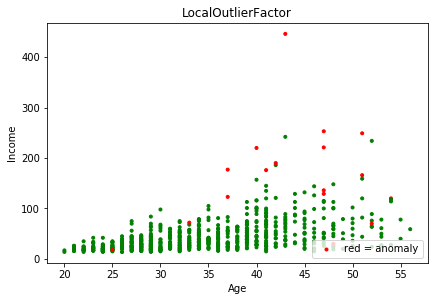

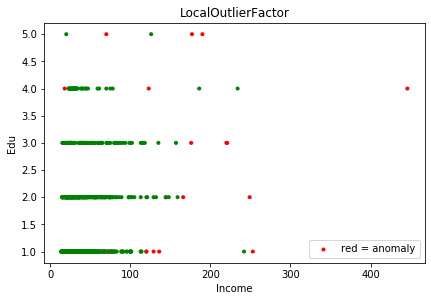

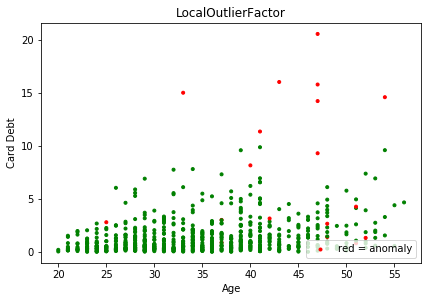

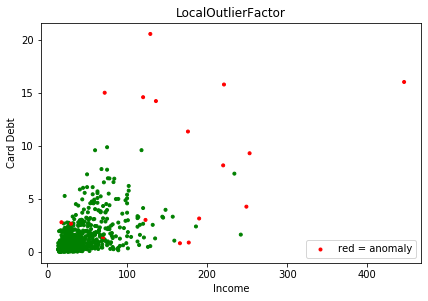

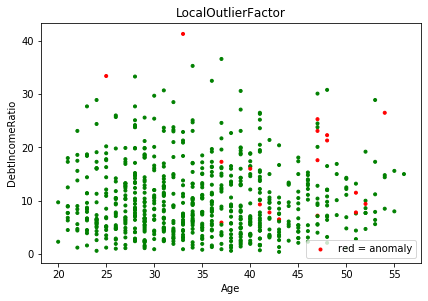

In [46]:
def plot_model(labels, alg_name, xlabel, ylabel):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(3,2,1) 
    color_code = {'anomaly':'red', 'normal':'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(cust[xlabel], cust[ylabel], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name)
plot_model(colors, 'LocalOutlierFactor', 'Age', 'Income')
plot_model(colors, 'LocalOutlierFactor', 'Income', 'Edu')
plot_model(colors, 'LocalOutlierFactor', 'Age', 'Card Debt')
plot_model(colors, 'LocalOutlierFactor', 'Income', 'Card Debt')
plot_model(colors, 'LocalOutlierFactor', 'Age', 'DebtIncomeRatio')

### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [58]:
# Write your code here
clf = IsolationForest(max_samples=1.0)
labels = clf.fit_predict(cust_norm)
colors = np.empty_like(labels, dtype='object')
colors[np.where(labels == -1)] = 'anomaly'
colors[np.where(labels == 1)] = 'normal'

* **What value did you use for the 'max_samples'?** I used 1.0 which draws all samples and does no sampling. Because dataset wasn't that big so I could consider all the samples as it would give better results for the dataset

**2.** Visualize the results using this function. You may also implement your own visualization function.

<Figure size 1080x1080 with 0 Axes>

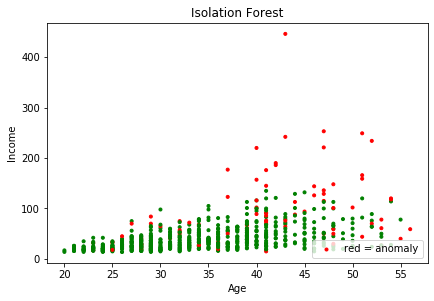

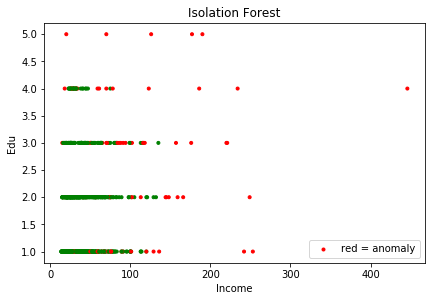

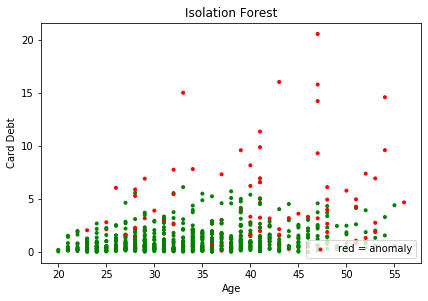

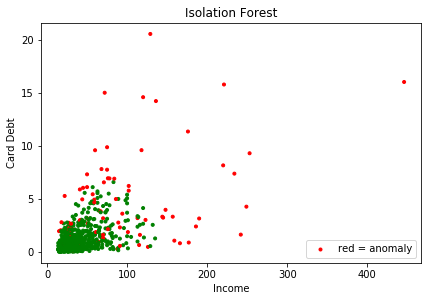

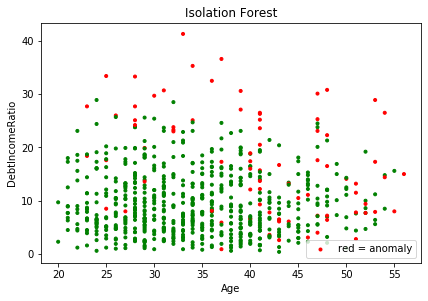

In [59]:
fig = plt.figure(figsize=(15,15))
plot_model(colors, 'Isolation Forest', 'Age', 'Income')
plot_model(colors, 'Isolation Forest', 'Income', 'Edu')
plot_model(colors, 'Isolation Forest', 'Age', 'Card Debt')
plot_model(colors, 'Isolation Forest', 'Income', 'Card Debt')
plot_model(colors, 'Isolation Forest', 'Age', 'DebtIncomeRatio')

* **Compare the results from both LOC and Isolation Forest:** 



*Comparison:* Local Outlier Factor gives inconsistent results compared to Isolation Forest. e.g In Income vs Education plot of Isolation Forest it could be seen that people with Edu 5 are some labelled as normal and some as outlier where as it should be more consistent. Same can be observed for many other plots and comparisons. Isolation Forest is more strict and perhaps labels some inliers as outliers but it is more consistent.